# Is my model better than predicting the mean?

It is easy to be convinced that a model is good if it has a low error.

But it is always a good idea to compare your model to a baseline, to see
if it is actually better than just predicting the mean.

This can be done easily in `modelskill` thanks to the `DummyModelResult`
class.

In [1]:
import modelskill as ms

fn = '../data/Oresund2D.dfsu'
mr = ms.model_result(fn, item='Surface elevation')
mr

<DfsuModelResult>: Oresund2D
Time: 2018-03-04 00:00:00 - 2018-03-10 22:40:00
Quantity: Surface Elevation [m]

In [2]:
fn = '../data/smhi_2095_klagshamn.dfs0'
obs = ms.PointObservation(fn, x=366844.15, y=6154291.6, item=0)
obs

<PointObservation>: smhi_2095_klagshamn
Location: 366844.15, 6154291.6
Time: 2015-01-01 01:00:00 - 2020-09-28 00:00:00
Quantity: Water Level [m]

In [3]:
dmr = ms.DummyModelResult(data=0.0)
dmr

DummyModelResult(name='dummy', data=0.0, strategy='constant')

In [4]:
cmp = ms.match(obs=obs, mod=[mr, dmr]).remove_bias()
cmp.skill().round(3)

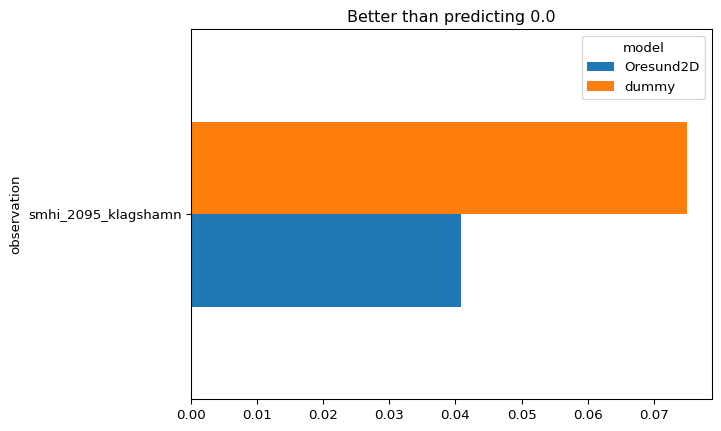

In [5]:
cmp.skill().rmse.plot.barh(title="Better than predicting 0.0");

Above we created a DummyModelResult which always predicts 0.0.

But we can be even more lazy and just use the `DummyModelResult` with
the `mean` strategy, which will predict the mean of the observed values.

In [6]:
dmr2 = ms.DummyModelResult(strategy='mean')
dmr2

DummyModelResult(name='dummy', data=None, strategy='mean')

In [7]:
cmp2 = ms.match(obs=obs, mod=[mr, dmr2]).remove_bias()
cmp2.skill().round(3)